In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import re

import lxml.html
import numpy as np
from sketchtml.repeats import TagPathClustering

In [3]:
#import requests

#page = requests.get('https://conferences.oreilly.com/jupyter/jup-ny/public/schedule/full/public')
#page_content = page.text
page_content = open('samples/Schedule_ All sessions_ Jupyter Notebook conference & training_ JupyterCon.html').read()

In [4]:
from collections import Counter

clustering = TagPathClustering(page_content,
                               with_id=False,
                               with_classes=True,
                               strip_digits=False)
clustering._build_tagpaths()

for tp, cnt in Counter(clustering.tagpaths).most_common():
    if cnt > 1:
        print('({:3d}) {}'.format(cnt, tp))

(210) /html/body/div/div/div/div.en_clearfix/div/div.en_schedule_day/div.en_schedule_time/div.en_session.vevent/div.en_grade_block/div.en_grade_average/img.en_rating_on
(155) /html/body/div/div/div/div.en_clearfix/div/div.en_schedule_day/div.en_schedule_time/div.en_session.vevent/div.en_session_roominfo/span.category.en_session_topics/a
(128) /html/body/div/div/div/div.en_clearfix/div/div.en_schedule_day/div.en_schedule_time/div.en_session.vevent/div.en_session_speakers/span.speaker_names/a
(122) /html/body/div/div/div/div.en_clearfix/div/div.en_schedule_day/div.en_schedule_time/div.en_session.vevent/div.en_session_speakers/img.lazy
( 86) /html/body/div/div/div/div.en_clearfix/div/div.en_schedule_day/div.en_schedule_time/div.en_plenary.en_session.vevent/div.en_grade_block/div.en_grade_average/img.en_rating_on
( 82) /html/body/div/div/div/div.en_clearfix/div/div.en_schedule_day/div.en_schedule_time/div.en_session.vevent
( 80) /html/body/div/div/div/div.en_clearfix/div/div.en_schedule_da

In [5]:
clusters = clustering.clusters()
#clusters

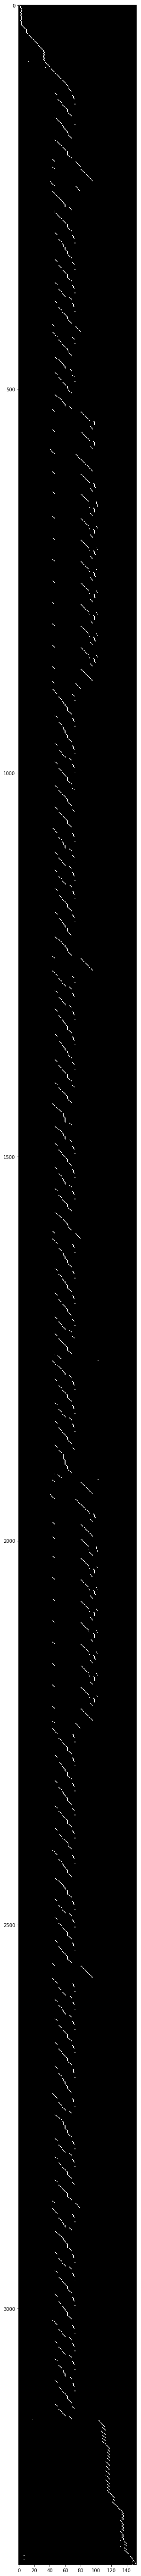

In [6]:
clustering.simhelper.plot_signals()

In [7]:
from pprint import pprint as pp

pp(clusters)

defaultdict(<class 'list'>,
            {0: ['/html/body/div/div/div/div.en_clearfix/div/div.en_schedule_day/div.en_schedule_time/div.en_session.vevent/div.en_grade_block/div.en_grade_average/img.en_rating_on',
                 '/html/body/div/div/div/div.en_clearfix/div/div.en_schedule_day/div.en_schedule_time/div.en_session.vevent/div.en_session_roominfo/span.category.en_session_topics/a',
                 '/html/body/div/div/div/div.en_clearfix/div/div.en_schedule_day/div.en_schedule_time/div.en_session.vevent/div.en_session_speakers/span.speaker_names/a',
                 '/html/body/div/div/div/div.en_clearfix/div/div.en_schedule_day/div.en_schedule_time/div.en_session.vevent/div.en_session_speakers/img.lazy',
                 '/html/body/div/div/div/div.en_clearfix/div/div.en_schedule_day/div.en_schedule_time/div.en_plenary.en_session.vevent/div.en_grade_block/div.en_grade_average/img.en_rating_on',
                 '/html/body/div/div/div/div.en_clearfix/div/div.en_schedule_day/

In [8]:
from pprint import pprint

for n, cluster in sorted(clusters.items()):
    if len(cluster) < 3:
        continue

    print('---- Cluster #{} ----'.format(n))
    for tp in sorted(cluster, key=lambda tp: tp.split('/')):
        to_print = []
        try:
            for nodepath in clustering.tagpath_nodes[tp][:10]:
                node = nodepath[-1]
                e = node.element
                texts = [s.strip() for s in e.xpath('./text()[normalize-space()]')]
                attribs = {k: v for k, v in e.attrib.items() if k not in ['class']}
                t = ' '.join(texts)
                #if t or attribs:
                if t:
                    to_print.append((node.doc_order, t, attribs))
            if to_print:
                print('---\n'+tp)
                for e in to_print:
                    print(e)
                print()
        except Exception as e:
            print(str(e))
            pass

---- Cluster #0 ----
---
/html/body/div/div/div/div.en_clearfix/div/div.en_schedule_day/div.en_schedule_time/div.en_plenary.en_session.vevent/div.en_grade_block/div.en_grade_average
(574, 'Average rating:', {'style': 'padding:0;display:inline;float:none;margin:0;vertical-align:top;'})
(601, 'Average rating:', {'style': 'padding:0;display:inline;float:none;margin:0;vertical-align:top;'})
(657, 'Average rating:', {'style': 'padding:0;display:inline;float:none;margin:0;vertical-align:top;'})
(690, 'Average rating:', {'style': 'padding:0;display:inline;float:none;margin:0;vertical-align:top;'})
(719, 'Average rating:', {'style': 'padding:0;display:inline;float:none;margin:0;vertical-align:top;'})
(748, 'Average rating:', {'style': 'padding:0;display:inline;float:none;margin:0;vertical-align:top;'})
(777, 'Average rating:', {'style': 'padding:0;display:inline;float:none;margin:0;vertical-align:top;'})
(806, 'Average rating:', {'style': 'padding:0;display:inline;float:none;margin:0;vertical-

In [ ]:
simhelper = clustering.simhelper

In [ ]:
from itertools import zip_longest, combinations
from collections import Counter


tagpaths = [
    tp for tp, cnt in Counter(clustering.tagpaths).most_common()
    if cnt > 1
]

l = len(tagpaths)
matrix = np.zeros((l, l))

for a, b in combinations(tagpaths, 2):
    ia, ib = tagpaths.index(a), tagpaths.index(b)
    try:
        matrix[ia, ib] = 1 - simhelper.similarity(a, b, epsilon=10)
    except:
        matrix[ia, ib] = 1
    matrix[ib, ia] = matrix[ia, ib]
    matrix[ia, ia] = 0
    matrix[ib, ib] = 0

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering2 = AgglomerativeClustering(n_clusters=l, affinity='precomputed', linkage='average')

clustering2.fit_predict(matrix)

In [ ]:
# Authors: Mathew Kallada
# License: BSD 3 clause
"""
=========================================
Plot Hierarachical Clustering Dendrogram 
=========================================

This example plots the corresponding dendrogram of a hierarchical clustering
using AgglomerativeClustering and the dendrogram method available in scipy.
"""

import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
ax = plt.plot()
plot_dendrogram(clustering2, labels=tagpaths, orientation='left'
                #, leaf_font_size=8
               )

In [9]:
# borrowed from https://stackoverflow.com/questions/8484943/construct-a-tree-from-list-os-file-paths-python-performance-dependent
from collections import defaultdict

FILE_MARKER = '<files>'

def attach(branch, trunk):
    '''
    Insert a branch of directories on its trunk.
    '''
    parts = branch.split('/', 1)
    if len(parts) == 1:  # branch is a file
        trunk[FILE_MARKER].append(parts[0])
        return trunk
    else:
        node, others = parts
        if node not in trunk:
            trunk[node] = defaultdict(dict, ((FILE_MARKER, []), ('<paths>', []), ('<texts>', [])))
        return attach(others, trunk[node])

def prettify(d, indent=0):
    '''
    Print the file tree structure with proper indentation.
    '''
    for key, value in d.items():
        if key == FILE_MARKER:
            if value:
                print('  ' * indent + str(value))
        elif key in ('<paths>', '<texts>'):
            if value:
                print('\n'.join('  ' * indent + v for v in value))
        else:
            print('  ' * indent + str(key))
            if isinstance(value, dict):
                prettify(value, indent+1)
            else:
                print('  ' * (indent+1) + str(value))

In [10]:
from pprint import pprint

for n, cluster in sorted(clusters.items()):
    if len(cluster) < 3:
        continue
    print('-------')
    print('Cluster #{}'.format(n))
    tree = defaultdict(dict, ((FILE_MARKER, []),))
    for tp in cluster:
        branch = attach(tp, tree)
        branch['<paths>'].append(tp)
        for nodepath in clustering.tagpath_nodes[tp][:10]:
            node = nodepath[-1]
            
            e = node.element
            texts = [s.strip() for s in e.xpath('./text()[normalize-space()]')]
            attribs = {k: v for k, v in e.attrib.items() if k not in ['class']}
            t = ' '.join(texts)
            if t.strip():
                branch['<texts>'].append(t)
    prettify(tree)

-------
Cluster #0

  html
    body
      ['noscript', 'div.remarketing']
      /html/body/noscript
      /html/body/div.remarketing
      div
        ['meta']
        /html/body/div/meta
        div
          ['div']
          /html/body/div/div/div
          div
            ['div.row']
            /html/body/div/div/div/div.row
            div.en_clearfix
              ['div']
              /html/body/div/div/div/div.en_clearfix/div
              div
                ['div.en_schedule_day']
                /html/body/div/div/div/div.en_clearfix/div/div.en_schedule_day
                div.en_schedule_day
                  ['div.en_schedule_time', 'h2']
                  /html/body/div/div/div/div.en_clearfix/div/div.en_schedule_day/div.en_schedule_time
                  /html/body/div/div/div/div.en_clearfix/div/div.en_schedule_day/h2
                  div.en_schedule_time
                    ['div.en_session.vevent', 'h3']
                    /html/body/div/div/div/div.en_clearfix/div

In [78]:
!pip install html-text

In [12]:
from collections import defaultdict, Counter
from functools import partial
import hashlib

import pygtrie
from pprint import pprint as pp
from pprint import pformat as pf

from html2text import html2text
from lxml.html import tostring
from slugify import slugify
import html_text

tohtml = partial(tostring, encoding='unicode')
totxt = html_text.extract_text

def hydrate(tree, doc, parent_path, merge_keys=True):
    relative_path = '>'.join(
        tree['_path'][len(parent_path):]
    ).lstrip('>')
    data = []
    _key = None
    for e in doc.cssselect(relative_path):
        if _key is None:
            _key = slugify(' '.join(filter(bool, [e.tag] + [re.sub(r'[\-\d]+', '', a)
                                                            for a in e.attrib.get('class', '').split()])), to_lower=True, separator='_')
            _key = relative_path.split('>')[-1]
            h = hashlib.sha256()
            h.update(_key.encode('utf8'))
            _key = '{}_{}'.format(e.tag, h.hexdigest()[:4])
        record = {}
        children_groups = list(filter(bool, [
                hydrate(child, e, tree['_path'], merge_keys=merge_keys)
                for child in tree['_children']
            ]))
        if children_groups:
            if merge_keys:
                for group in children_groups:
                    children = defaultdict(list)
                    for child in group:
                        key = child.pop('_key')
                        _attr = child.get('_attribs')
                        if _attr:
                            _cls = _attr.get('class')
                            if _cls:
                                _attr.pop('class')
                                key = _cls
                            child.update(child.pop('_attribs'))
                        children[key].append(child)
                    record.update(children)
            else:
                record['_children'] = children_groups
        if tree['_value']:
            _t = ' '.join([re.sub(r'\s+', ' ', s)
                           for s in e.xpath('self::*[not(self::script) and not(self::style)]/text()[normalize-space()]')]).strip()
            _t = totxt(tohtml(e))
            if _t:
                record['_text'] = _t
            #elif not record.get('_children'):
            elif not children_groups:
                _t = '__NO-CHILDREN__'+e.xpath('normalize-space()').strip()
                _t = ' '.join([re.sub(r'\s+', ' ', s)
                    for s in e.xpath('self::*[not(self::script) and not(self::style)]/text()[normalize-space()]')]).strip()+_t
                _t = totxt(tohtml(e))
                if _t:
                    if len(_t) > 50:
                        record['_text'] = _t[:50]+'...'
                    else:
                        record['_text'] = _t
            _a = {k: re.sub('\s+', ' ', v.strip())
                                      for k, v in e.attrib.items()
                                      if k not in  (
                                          #'class',
                                          'style',
                                      )}
            if _a:
                record['_attribs'] = _a
        if record:
            record['_key'] = _key
            data.append(record)
    #if data and len(data) == 1:
    #    return data[0]
    return data
    #return {d.pop('_key'): d for d in data}

def make(path_conv, path, children, value=None):
    children = list(children)
    if value is None and len(children) == 1:
        # There is only one prefix.
        return children[0]
    else:
        return {'_children': children,
                #'_value': value[:64]+'...'+value[-64:] if value else value,
                '_value': value,
                '_path': path}



In [13]:
for i, cluster in clusters.items():
    print('Cluster {}'.format(i))
    #print()
    c = Counter([len(tp.split('/')) for tp in cluster])
    #print(dict(c))
    print('Cluster size: {}, cluster depths: {} ({}), depth_diff={}'.format(len(cluster), c, len(c), (max(c) - min(c))))
    print()
    

Cluster 0
Cluster size: 45, cluster depths: Counter({14: 10, 13: 9, 10: 8, 11: 5, 4: 4, 12: 3, 9: 2, 5: 1, 6: 1, 7: 1, 8: 1}) (11), depth_diff=10

Cluster 1
Cluster size: 15, cluster depths: Counter({12: 6, 13: 5, 14: 4}) (3), depth_diff=2

Cluster 2
Cluster size: 16, cluster depths: Counter({12: 6, 13: 5, 14: 4, 11: 1}) (4), depth_diff=3

Cluster 5
Cluster size: 4, cluster depths: Counter({13: 2, 11: 1, 12: 1}) (3), depth_diff=2

Cluster 4
Cluster size: 7, cluster depths: Counter({14: 3, 13: 2, 11: 1, 12: 1}) (4), depth_diff=3

Cluster 7
Cluster size: 4, cluster depths: Counter({13: 2, 11: 1, 12: 1}) (3), depth_diff=2

Cluster 3
Cluster size: 4, cluster depths: Counter({12: 1, 13: 1, 14: 1, 11: 1}) (4), depth_diff=3

Cluster 6
Cluster size: 4, cluster depths: Counter({12: 2, 11: 1, 13: 1}) (3), depth_diff=2



In [ ]:
doc = lxml.html.fromstring(page_content)
for n, cluster in sorted(clusters.items()):
    size = len(cluster)
    #if size < 2 and size > 30:
    #    continue
    c = Counter([len(tp.split('/')) for tp in cluster])
    depth_diff = max(c) - min(c)
    #if depth_diff > 10:
    #    continue
    print("Cluster {}".format(n))
    tagpaths_trie = pygtrie.Trie()
    for tp in cluster:
        tagpaths_trie[tp.split('/')] = tp
        
    r = tagpaths_trie.traverse(make)
    
    o = hydrate(r, doc, '', merge_keys=False)
    print('Size {}'.format(len(o)))
    s = pf(o)

In [15]:
doc = lxml.html.fromstring(page_content)
tagpaths_trie = pygtrie.Trie()
for tp in clusters[1]:
    tagpaths_trie[tp.split('/')] = tp
additional_tps = [
    '/html/body/div/div/div/div.en_clearfix/div/div.en_schedule_day/div.en_schedule_time/div.en_session.vevent/div.en_session_speakers/img.lazy',
    '/html/body/div/div/div/div.en_clearfix/div/div.en_schedule_day/div.en_schedule_time/div.en_plenary.en_session.vevent/div.en_session_speakers/img.lazy',
    '/html/body/div/div/div/div.en_clearfix/div/div.en_schedule_day/div.en_schedule_time/div.en_session.vevent/div.en_session_speakers/span.speaker_names/a',
    '/html/body/div/div/div/div.en_clearfix/div/div.en_schedule_day/div.en_schedule_time/h3/a',
    '/html/body/div/div/div/div.en_clearfix/div/div.en_schedule_day/h2/a',
]
for tp in additional_tps: 
    tagpaths_trie[tp.split('/')] = tp
    #pass

r = tagpaths_trie.traverse(make)

o = hydrate(r, doc, '', merge_keys=True)
s = pf(o)

In [16]:
import json

JSON_FORMAT_KWARGS = {
    'indent': 2,
    'separators': (',', ': '),
    'sort_keys': True,
}
with open('test.txt', 'w') as fp:
    json.dump(o, fp, **JSON_FORMAT_KWARGS)
    fp.write("\n")


In [ ]:

def pretty(path_conv, path, children, value=None):
    children = list(children)
    if value is None and len(children) == 1:
        # There is only one prefix.
        return children[0]
    else:
        print('/'.join(path))

tagpaths_trie.traverse(pretty)

In [ ]:
list(tagpaths_trie.iterkeys())

In [22]:
p = '>'.join(additional_tps[0].split('/')).lstrip('>')
doc.cssselect(p)

[<Element img at 0x7f0efbc88a98>,
 <Element img at 0x7f0efbc88278>,
 <Element img at 0x7f0efbc88228>,
 <Element img at 0x7f0efbb4b638>,
 <Element img at 0x7f0efbb4b5e8>,
 <Element img at 0x7f0efbb4b688>,
 <Element img at 0x7f0efbb4b6d8>,
 <Element img at 0x7f0efbb4b728>,
 <Element img at 0x7f0efbb4b778>,
 <Element img at 0x7f0efbb4b7c8>,
 <Element img at 0x7f0efbb4b818>,
 <Element img at 0x7f0efbb4b868>,
 <Element img at 0x7f0efbb4b8b8>,
 <Element img at 0x7f0efbb4b908>,
 <Element img at 0x7f0efbb4b958>,
 <Element img at 0x7f0efbb4b9a8>,
 <Element img at 0x7f0efbb4b9f8>,
 <Element img at 0x7f0efbb4ba48>,
 <Element img at 0x7f0efbb4ba98>,
 <Element img at 0x7f0efbb4bae8>]